In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


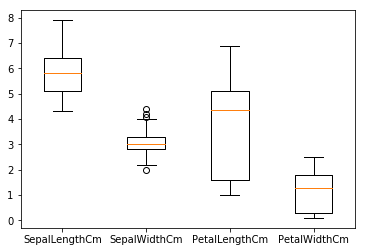

In [8]:
plt.boxplot([df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],df.iloc[:,4]],labels=df.columns[1:-1])
plt.show()

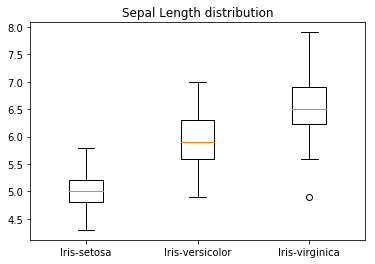

In [9]:
plt.title('Sepal Length distribution')
sl_setosa = df.loc[df['Species']=='Iris-setosa',df.columns[1]] #2,3,4
sl_versi = df.loc[df['Species'] =='Iris-versicolor',df.columns[1]] #2,3,4
sl_virgi = df.loc[df['Species'] =='Iris-virginica',df.columns[1]] #2,3,4
plt.boxplot([sl_setosa,sl_versi,sl_virgi],labels=df['Species'].unique())
plt.show()

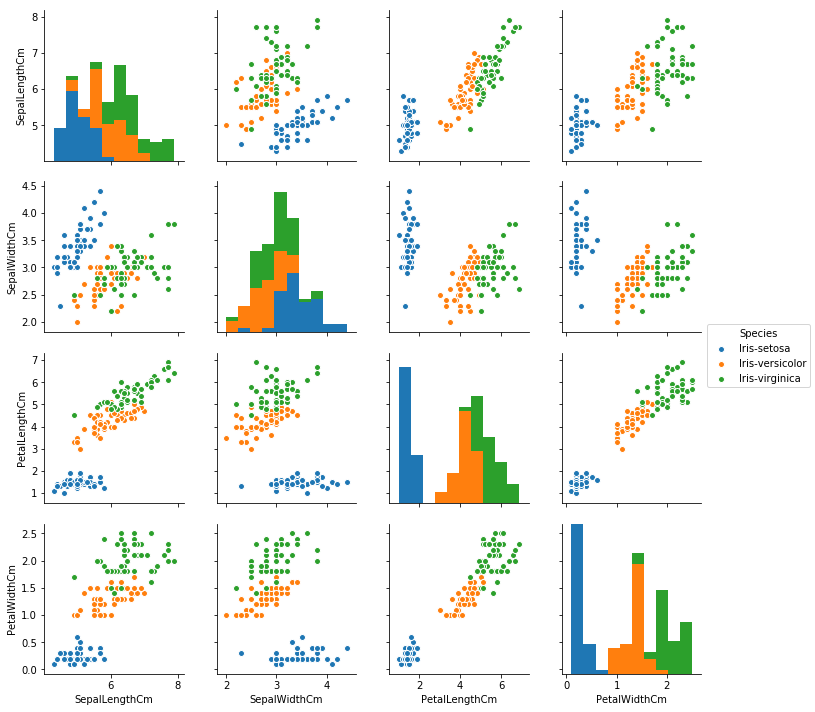

In [10]:
import seaborn as sns
sns.pairplot(df.iloc[:,1:],hue='Species')

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [19]:
X = df.iloc[:,[1,4]]
y = df.iloc[:,5]
txf = dict(zip(df['Species'].unique(),[0,1,2]))
y = y.map(txf)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_pred = clf.predict(X_test)
y_pred

array([2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 1], dtype=int64)

In [22]:
misclf = np.count_nonzero(y_pred - y_test)
accuracy = 1 - misclf/len(y_test)
print(accuracy)

0.9


In [23]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  2],
       [ 0,  1, 10]], dtype=int64)

In [24]:
px = []
py = []
z = []
for sl in np.arange( df.iloc[:,1].min()-0.5,df.iloc[:,1].max()+0.5,0.01):
    for pw in np.arange( df.iloc[:,4].min()-0.5,df.iloc[:,4].max()+0.5,0.01):
        px.append(sl)
        py.append(pw)

In [27]:
XX = np.array([x for x in zip(px,py)])
yy = clf.predict(XX)

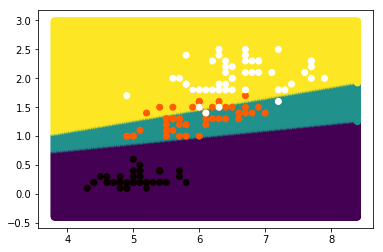

In [29]:
plt.scatter(XX[:,0],XX[:,1],c=yy)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y,cmap='hot')
plt.show()